In [6]:
from __future__ import print_function

from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'
! mkdir $folder

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_miso_modalities', flotilla_dir=flotilla_dir)

2016-07-14 12:07:42	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_miso_modalities/datapackage.json
2016-07-14 12:07:42	Parsing datapackage to create a Study object
2016-07-14 12:08:27 	Initializing Study
2016-07-14 12:08:27 	Initializing Predictor configuration manager for Study
2016-07-14 12:08:27	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-07-14 12:08:27	Added ExtraTreesClassifier to default predictors
2016-07-14 12:08:27	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-07-14 12:08:27	Added ExtraTreesRegressor to default predictors
2016-07-14 12:08:27	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-07-14 12:08:27	Added GradientBoostingClassifier to default predictors
2016-07-14 12:08:27	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.g

In [7]:
modalities_counts = study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).count().reset_index()
modalities_counts = modalities_counts.rename(columns={'event_id': '# AS events'})
modalities_counts.head()

,phenotype,modality,# AS events
0,MN,bimodal,1244
1,MN,excluded,3277
2,MN,included,3058
3,MN,middle,34
4,MN,uncategorized,3745


In [8]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

modalities_counts_2d = modalities_counts.pivot(index='phenotype', columns='modality', values='# AS events')
modalities_counts_2d = modalities_counts_2d.reindex(columns=MODALITY_ORDER, index=study.phenotype_order)
modalities_counts_2d = modalities_counts_2d.T
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,5147,3836,3277
bimodal,805,813,1244
included,5806,3918,3058
middle,111,56,34
uncategorized,5819,4799,3745


In [9]:
modalities_counts_2d = modalities_counts_2d.fillna(0)
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,5147,3836,3277
bimodal,805,813,1244
included,5806,3918,3058
middle,111,56,34
uncategorized,5819,4799,3745


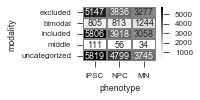

In [10]:
sns.set(style='ticks', context='paper')
fig, ax= plt.subplots(figsize=(2.75, 1.5))
mask = modalities_counts_2d.isnull()
sns.heatmap(modalities_counts_2d, annot=True, mask=mask, fmt='g', annot_kws=dict(size=9), 
            cmap='Greys', linewidth=1, linecolor='grey')
fig.tight_layout()
fig.savefig('{}/modalities_counts_heatmap.pdf'.format(folder))

### Plot modality percentage barplots

In [13]:
modalities_counts['percentage'] = 100*modalities_counts.groupby('phenotype')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts

,phenotype,modality,# AS events,percentage
0,MN,bimodal,1244,10.952633
1,MN,excluded,3277,28.851911
2,MN,included,3058,26.923754
3,MN,middle,34,0.299348
4,MN,uncategorized,3745,32.972354
5,NPC,bimodal,813,6.057219
6,NPC,excluded,3836,28.579943
7,NPC,included,3918,29.190881
8,NPC,middle,56,0.417225
9,NPC,uncategorized,4799,35.754731


In [14]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

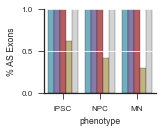

In [17]:

fig, ax = plt.subplots(figsize=(2, 1.5))

# ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order, zorder=-1)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
ax.set(ylabel='% AS Exons')
ax.grid(axis='y', color='white', zorder=100)
sns.despine()
fig.savefig('{}/modalities_barplot.pdf'.format(folder))

ax.set(ylim=(0, 1))
# ax.grid(axis='y', color='grey', zorder=np.inf)
fig.savefig('{}/modalities_barplot_zoom.pdf'.format(folder))

# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# sns.despine(ax=ax, bottom=True)
# ax.tick_params(axis='x', bottom='off')
# ax.set(xticks=[], xlabel='', ylim=(10, 65), ylabel='', yticks=[10, 35, 60])

# ax = axes[1]
# sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
#            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
# ax.set(ylim=(0, 0.5), ylabel='% AS Exons', 
#        xlabel='')
# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# sns.despine(ax=ax)
# # fig.tight_layout()
# fig.savefig('{}/modalities_barplot.pdf'.format(folder))

## Modality venn

In [18]:
import matplotlib_venn

sns.set(context='paper', style='ticks')

from anchor import MODALITY_ORDER

study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal          1244
           excluded         3277
           included         3058
           middle             34
           uncategorized    3745
NPC        bimodal           813
           excluded         3836
           included         3918
           middle             56
           uncategorized    4799
iPSC       bimodal           805
           excluded         5147
           included         5806
           middle            111
           uncategorized    5819
dtype: int64

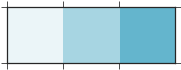

In [19]:
sns.palplot(sns.light_palette(MODALITY_PALETTE[0], n_colors=3))

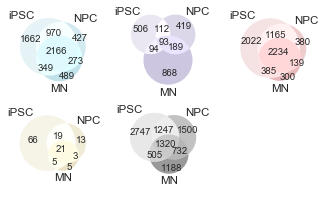

In [24]:
from anchor import MODALITY_TO_CMAP

fig, axes = plt.subplots(figsize=(4.5, 3), nrows=2, ncols=3)

axes_iter = axes.flat

grouped_modality = study.supplemental.modalities_tidy.groupby('modality')

for modality in MODALITY_ORDER:
    modality_df = grouped_modality.get_group(modality)
#     if modality == 'middle':
#         continue
    grouped_phenotype = modality_df.groupby('phenotype')
    sets = [set(grouped_phenotype.get_group(phenotype)['event_id']) for phenotype in study.phenotype_order]
    
    ax = axes_iter.next()
    cmap = MODALITY_TO_CMAP[modality]

    set_colors = cmap(np.linspace(0, 1, 4))[1:]

#     set_colors = sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)
#     set_colors = study.phenotype_color_ordered
    matplotlib_venn.venn3(sets, set_labels=study.phenotype_order, set_colors=set_colors, ax=ax)
ax = axes[-1][-1]
ax.axis('off')
#     ax.set(title=modality)
fig.tight_layout()
fig.savefig('{}/venn_diagrams.pdf'.format(folder))

In [26]:
same_in_all_three_modalities = study.supplemental.modalities_tidy.groupby(['modality', 'event_id']).filter(lambda x: len(x) == len(study.phenotype_order))
same_in_all_three_modalities

,event_id,phenotype,modality
12,chr10:101507014:101507147:+@chr10:101510126:10...,MN,uncategorized
13,chr10:101507014:101507147:+@chr10:101510126:10...,NPC,uncategorized
14,chr10:101507014:101507147:+@chr10:101510126:10...,iPSC,uncategorized
45,chr10:102045854:102045970:-@chr10:102042663:10...,MN,excluded
46,chr10:102045854:102045970:-@chr10:102042663:10...,NPC,excluded
47,chr10:102045854:102045970:-@chr10:102042663:10...,iPSC,excluded
48,chr10:102286156:102286311:-@chr10:102283734:10...,MN,excluded
49,chr10:102286156:102286311:-@chr10:102283734:10...,NPC,excluded
50,chr10:102286156:102286311:-@chr10:102283734:10...,iPSC,excluded
51,chr10:102286732:102286831:-@chr10:102286156:10...,MN,included


In [29]:
same_in_all_three_modalities.groupby('event_id')['modality']

In [31]:
same_in_all_three_modalities = same_in_all_three_modalities[['event_id', 'modality']].drop_duplicates()
same_in_all_three_modalities.head()

,event_id,modality
12,chr10:101507014:101507147:+@chr10:101510126:10...,uncategorized
45,chr10:102045854:102045970:-@chr10:102042663:10...,excluded
48,chr10:102286156:102286311:-@chr10:102283734:10...,excluded
51,chr10:102286732:102286831:-@chr10:102286156:10...,included
63,chr10:102746847:102746953:-@chr10:102746506:10...,included


In [38]:
same_in_all_three_modalities_splice_types = same_in_all_three_modalities.join(study.splicing.feature_data['splice_type'], on='event_id')
same_in_all_three_modalities_splice_types.head()

,event_id,modality,splice_type
12,chr10:101507014:101507147:+@chr10:101510126:10...,uncategorized,SE
45,chr10:102045854:102045970:-@chr10:102042663:10...,excluded,SE
48,chr10:102286156:102286311:-@chr10:102283734:10...,excluded,SE
51,chr10:102286732:102286831:-@chr10:102286156:10...,included,SE
63,chr10:102746847:102746953:-@chr10:102746506:10...,included,MXE


In [44]:
s = study.splicing.feature_data['splice_type']
all_events = s.groupby(s).size()
all_events.name = 'all'
all_events

splice_type
MXE     6226
SE     33324
Name: all, dtype: int64

In [49]:
splice_type_modalities = same_in_all_three_modalities_splice_types.groupby(['modality', 'splice_type']).size().unstack()
splice_type_modalities = splice_type_modalities.append(all_events)
splice_type_modalities

splice_type,MXE,SE
modality,,
bimodal,8,85
excluded,260,1906
included,207,2027
middle,19,2
uncategorized,458,862
all,6226,33324


In [52]:
tidy = splice_type_modalities.unstack().reset_index()
tidy = tidy.rename(columns={0: 'n_events'})
tidy

,splice_type,modality,n_events
0,MXE,bimodal,8
1,MXE,excluded,260
2,MXE,included,207
3,MXE,middle,19
4,MXE,uncategorized,458
5,MXE,all,6226
6,SE,bimodal,85
7,SE,excluded,1906
8,SE,included,2027
9,SE,middle,2


In [77]:
tidy['percentage_of_modality'] = tidy.groupby('modality')['n_events'].apply(lambda x: 100 * x/x.sum())
tidy

,splice_type,modality,n_events,percentage_of_modality
0,MXE,bimodal,8,8.602151
1,MXE,excluded,260,12.003693
2,MXE,included,207,9.265891
3,MXE,middle,19,90.476190
4,MXE,uncategorized,458,34.696970
5,MXE,all,6226,15.742099
6,SE,bimodal,85,91.397849
7,SE,excluded,1906,87.996307
8,SE,included,2027,90.734109
9,SE,middle,2,9.523810


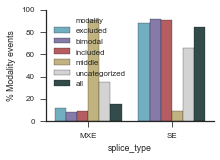

In [81]:
import anchor

hue_order = anchor.MODALITY_ORDER + ['all']
palette = anchor.MODALITY_PALETTE + ['DarkSlateGray']

fig, ax = plt.subplots(figsize=(3, 2))
sns.barplot(x='splice_type', y='percentage_of_modality', hue='modality', data=tidy, 
            hue_order=hue_order, palette=palette)
ax.set(ylabel='% Modality events')
sns.despine()
fig.savefig('{}/percent_modality_in_splice_types.pdf'.format(folder))

In [73]:
same_in_all_three_modalities_events = same_in_all_three_modalities.groupby('event_id')['modality']
same_in_all_three_modalities_events[:10]

NotImplementedError: Not implemented: slice(None, 10, None)

In [83]:
figure_folder = '{}/same_in_all_phenotypes'.format(folder)

In [84]:
middle_folder = '{}/middle'.format(figure_folder)

In [85]:
mkdir -p $middle_folder

In [86]:
middle_events = same_in_all_three_modalities.query('modality == "middle"')['event_id']
# middle_events[:10]

# len(middle_events)

for event in middle_events:
    gene_name = study.splicing.feature_data['gene_name'][event]
    study.plot_event(event)
    fig = plt.gcf()
    fig.savefig('{}/{}_{}.pdf'.format(middle_folder, gene_name, event))
plt.close('all')

In [87]:
uncategorized_folder = '{}/uncategorized'.format(figure_folder)

In [91]:
mkdir -p $uncategorized_folder

In [92]:
uncategorized_events = same_in_all_three_modalities.query('modality == "uncategorized"')['event_id']
# middle_events[:10]

# len(middle_events)

for event in uncategorized_events:
    gene_name = study.splicing.feature_data['gene_name'][event]
    study.plot_event(event)
    fig = plt.gcf()
    fig.savefig('{}/{}_{}.pdf'.format(uncategorized_folder, gene_name, event))
plt.close('all')